In [205]:
#Import all necessary packages for this project
import warnings
import os
import requests

import tweepy
import json
import ndjson
import io

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from io import BytesIO
from pandas.core.common import SettingWithCopyWarning
from matplotlib import rcParams

%matplotlib inline

# Gather

In [206]:
#Make list of URLs of the structured text files from the Udacity website to be downloaded to working directory.
data_urls = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv',
             'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv']

In [207]:
#Test to make sure the str.split() method grabs the correct text from the URL.
print(data_urls[0].split('/')[-1])

twitter-archive-enhanced.csv


In [208]:
#Create the response variable and save it (in bytes) to the working directory.
for url in data_urls:
    if not os.path.exists(url.split('/')[-1]):
        resp = requests.get(url)
        with open(os.path.join('./',url.split('/')[-1]),mode='wb') as file:
            file.write(resp.content)

## Gathering: Load data set 1

In [209]:
#Read the twitter archive .csv
twitter_archive = pd.read_csv(data_urls[0])

## Gathering: Load data set 2

In [210]:
#Read the image predictions .tsv
image_preds = pd.read_csv(data_urls[1],sep='\t')

In [211]:
#Store the necessary tokens and keys to build an OAuthHandler instance
consumer_key = '3oBwCRFEVEMusKcj9Mvtu0cc7'
consumer_secret = 'CW3zXkE9LuHY5MLWOHSpsbYP45QEfV8pb8goQZYYPGCcxTkIpH'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAHYdLQEAAAAAOC8acQb075G5TfifmwNrISWvgL4%3DrSxqRDuXg3Dw3OrxvvjCrungc62qkYUP2XyZp94f5TlYjfkeGe'
access_token = '1344183163703189504-nSSmaB1a55zXT5rZEgt6j7nY8fjnl7'
access_secret = 'i9mq3xeHRwMQPiMSNZBqX5u7AxNvKeaVa1ReOWzpfQCCd'

In [212]:
auth = tweepy.OAuthHandler(consumer_key,consumer_secret) #Create OAuthHandler instance
try:
    auth.set_access_token(access_token,access_secret) #Equip OAuthHandler with access_token
except tweepy.TweepError:
    print('Error! Failed to get access token')

In [213]:
#Make the api object and pass the OAuthHandler to the establish the API
api = tweepy.API(auth,parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True)

In [214]:
#Verify that the API has been established - alert user if there is an error
try:
    api.verify_credentials()
    print('API authentification successful.')
except:
    print('Error during authentification')

API authentification successful.


In [215]:
tweet_ids = twitter_archive.tweet_id

In [216]:
#Download the twitter data my local machine in the form of a json stored in tweet_json.txt and append them to a list
#called 'tweet_list'
failure_dict = {}
tweet_list = []
n = 0
with open(file='tweet_json.txt',mode='w') as f:
    for tweet_id in tweet_ids:
        n += 1
        print(str(n)+':'+str(tweet_id))
        try:
            tweet = api.get_status(id=tweet_id,tweet_mode='extended')
            #print('Tweet successfully acquired')
            json.dump(tweet,f)
            tweet_list.append(tweet)
            f.write('\n')
        except tweepy.TweepError as error:
            #print('Fail')
            failure_dict[tweet_id] = error
            pass

1:892420643555336193
2:892177421306343426
3:891815181378084864
4:891689557279858688
5:891327558926688256
6:891087950875897856
7:890971913173991426
8:890729181411237888
9:890609185150312448
10:890240255349198849
11:890006608113172480
12:889880896479866881
13:889665388333682689
14:889638837579907072
15:889531135344209921
16:889278841981685760
17:888917238123831296
18:888804989199671297
19:888554962724278272
20:888202515573088257
21:888078434458587136
22:887705289381826560
23:887517139158093824
24:887473957103951883
25:887343217045368832
26:887101392804085760
27:886983233522544640
28:886736880519319552
29:886680336477933568
30:886366144734445568
31:886267009285017600
32:886258384151887873
33:886054160059072513
34:885984800019947520
35:885528943205470208
36:885518971528720385
37:885311592912609280
38:885167619883638784
39:884925521741709313
40:884876753390489601
41:884562892145688576
42:884441805382717440
43:884247878851493888
44:884162670584377345
45:883838122936631299
46:8834828469330042

362:829501995190984704
363:829449946868879360
364:829374341691346946
365:829141528400556032
366:829011960981237760
367:828801551087042563
368:828770345708580865
369:828708714936930305
370:828650029636317184
371:828409743546925057
372:828408677031882754
373:828381636999917570
374:828376505180889089
375:828372645993398273
376:828361771580813312
377:828046555563323392
378:828011680017821696
379:827933404142436356
380:827653905312006145
381:827600520311402496
382:827324948884643840
383:827228250799742977
384:827199976799354881
385:826958653328592898
386:826848821049180160
387:826615380357632002
388:826598799820865537
389:826598365270007810
390:826476773533745153
391:826240494070030336
392:826204788643753985
393:826115272272650244
394:825876512159186944
395:825829644528148480
396:825535076884762624
397:825147591692263424
398:825120256414846976
399:825026590719483904
400:824796380199809024
401:824775126675836928
402:824663926340194305
403:824325613288833024
404:824297048279236611
405:8240251

719:783466772167098368
720:783391753726550016
721:783347506784731136
722:783334639985389568
723:783085703974514689
724:782969140009107456
725:782747134529531904
726:782722598790725632
727:782598640137187329
728:782305867769217024
729:782021823840026624
730:781955203444699136
731:781661882474196992
732:781655249211752448
733:781524693396357120
734:781308096455073793
735:781251288990355457
736:781163403222056960
737:780931614150983680
738:780858289093574656
739:780800785462489090
740:780601303617732608
741:780543529827336192
742:780496263422808064
743:780476555013349377
744:780459368902959104
745:780192070812196864
746:780092040432480260
747:780074436359819264
748:779834332596887552
749:779377524342161408
750:779124354206535695
751:779123168116150273
752:779056095788752897
753:778990705243029504
754:778774459159379968
755:778764940568104960
756:778748913645780993
757:778650543019483137
758:778624900596654080
759:778408200802557953
760:778396591732486144
761:778383385161035776
762:7782868

1073:739979191639244800
1074:739932936087216128
1075:739844404073074688
1076:739623569819336705
1077:739606147276148736
1078:739544079319588864
1079:739485634323156992
1080:739238157791694849
1081:738891149612572673
1082:738885046782832640
1083:738883359779196928
1084:738537504001953792
1085:738402415918125056
1086:738184450748633089
1087:738166403467907072
1088:738156290900254721
1089:737826014890496000
1090:737800304142471168
1091:737678689543020544
1092:737445876994609152
1093:737322739594330112
1094:737310737551491075
1095:736736130620620800
1096:736392552031657984
1097:736365877722001409
1098:736225175608430592
1099:736010884653420544
1100:735991953473572864
1101:735648611367784448
1102:735635087207878657
1103:735274964362878976
1104:735256018284875776
1105:735137028879360001
1106:734912297295085568
1107:734787690684657664
1108:734776360183431168
1109:734559631394082816
1110:733828123016450049
1111:733822306246479872
1112:733482008106668032
1113:733460102733135873
1114:73310948527

1415:698710712454139905
1416:698703483621523456
1417:698635131305795584
1418:698549713696649216
1419:698355670425473025
1420:698342080612007937
1421:698262614669991936
1422:698195409219559425
1423:698178924120031232
1424:697995514407682048
1425:697990423684476929
1426:697943111201378304
1427:697881462549430272
1428:697630435728322560
1429:697616773278015490
1430:697596423848730625
1431:697575480820686848
1432:697516214579523584
1433:697482927769255936
1434:697463031882764288
1435:697270446429966336
1436:697259378236399616
1437:697255105972801536
1438:697242256848379904
1439:696900204696625153
1440:696894894812565505
1441:696886256886657024
1442:696877980375769088
1443:696754882863349760
1444:696744641916489729
1445:696713835009417216
1446:696518437233913856
1447:696490539101908992
1448:696488710901260288
1449:696405997980676096
1450:696100768806522880
1451:695816827381944320
1452:695794761660297217
1453:695767669421768709
1454:695629776980148225
1455:695446424020918272
1456:69540946441

1757:678767140346941444
1758:678764513869611008
1759:678755239630127104
1760:678740035362037760
1761:678708137298427904
1762:678675843183484930
1763:678643457146150913
1764:678446151570427904
1765:678424312106393600
1766:678410210315247616
1767:678399652199309312
1768:678396796259975168
1769:678389028614488064
1770:678380236862578688
1771:678341075375947776
1772:678334497360859136
1773:678278586130948096
1774:678255464182861824
1775:678023323247357953
1776:678021115718029313
1777:677961670166224897
1778:677918531514703872
1779:677895101218201600
1780:677716515794329600
1781:677700003327029250
1782:677698403548192770
1783:677687604918272002
1784:677673981332312066
1785:677662372920729601
1786:677644091929329666
1787:677573743309385728
1788:677565715327688705
1789:677557565589463040
1790:677547928504967168
1791:677530072887205888
1792:677335745548390400
1793:677334615166730240
1794:677331501395156992
1795:677328882937298944
1796:677314812125323265
1797:677301033169788928
1798:67726928170

2099:670727704916926465
2100:670717338665226240
2101:670704688707301377
2102:670691627984359425
2103:670679630144274432
2104:670676092097810432
2105:670668383499735048
2106:670474236058800128
2107:670468609693655041
2108:670465786746662913
2109:670452855871037440
2110:670449342516494336
2111:670444955656130560
2112:670442337873600512
2113:670435821946826752
2114:670434127938719744
2115:670433248821026816
2116:670428280563085312
2117:670427002554466305
2118:670421925039075328
2119:670420569653809152
2120:670417414769758208
2121:670411370698022913
2122:670408998013820928
2123:670403879788544000
2124:670385711116361728
2125:670374371102445568
2126:670361874861563904
2127:670338931251150849
2128:670319130621435904
2129:670303360680108032
2130:670290420111441920
2131:670093938074779648
2132:670086499208155136
2133:670079681849372674
2134:670073503555706880
2135:670069087419133954
2136:670061506722140161
2137:670055038660800512
2138:670046952931721218
2139:670040295598354432
2140:67003718982

In [217]:
tweet_list[0]['id']

892420643555336193

In [218]:
#Display the first object in the json to get a feel for what data are included from the API.
tweet_list[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [219]:
n = len(tweet_list)
n

2331

In [220]:
len(failure_dict)

25

In [221]:
len(tweet_ids) - len(tweet_list)

25

In [222]:
type(tweet_list)

list

In [223]:
#Declare the retweet_list as an empty DataFrame
retweet_list = pd.DataFrame(index=range(n),columns=['tweet_id','retweet_count'])

In [224]:
retweet_list.shape

(2331, 2)

In [225]:
#Store the contents of the list tweet_list into the retweet_list DataFrame
retweet_list = pd.DataFrame.from_records(tweet_list)
retweet_list = retweet_list.loc[:,['id','retweet_count','favorite_count']]

In [226]:
retweet_list.head()

id  retweet_count  favorite_count
0  892420643555336193           7426           35195
1  892177421306343426           5523           30459
2  891815181378084864           3646           22908
3  891689557279858688           7603           38482
4  891327558926688256           8187           36750

# Assess (markdown cells) and Clean (code cells)

## Assess Issue No. 1
### Define
**Assessment:** 'id' should be a string since ids can't be added together. <br>
**Solution:** Use Pandas.Series.astype() method to convert the data type of 'id'.

## Clean issue No. 1

### Code

In [227]:
#Display information about the features of the retweet_list DataFrame
retweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 54.8 KB


In [228]:
#Display the feature names in the retweet_list DataFrame 
retweet_list.columns

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')

In [229]:
#Convert 'id' from an integer to a string
retweet_list.id = retweet_list.id.astype(str)

### Test

In [230]:
retweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id                2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


## Assess Issue No. 2
### Define
 **Assessment:** The 'id' (in retweet_list) column name should be renamed to 'tweet_id' to kept consistent
 with the 'twitter_archive' dataset.** <br>
 **Solution:** use the Pandas.Series.rename() method to rename the feature.

## Clean issue No. 1
### Code

In [231]:
#Rename the 'id' variable to 'tweet_id' to be consistent across all DataFrames
remapper_dict = {'id':'tweet_id'}
retweet_list.rename(mapper=remapper_dict,inplace=True,axis=1)

### Test

In [232]:
retweet_list.head()

tweet_id  retweet_count  favorite_count
0  892420643555336193           7426           35195
1  892177421306343426           5523           30459
2  891815181378084864           3646           22908
3  891689557279858688           7603           38482
4  891327558926688256           8187           36750

In [233]:
retweet_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [234]:
#check for NaNs in the DataFrame
nas = retweet_list.isna().sum()
nas
print('The number of empty entries is {} tweet ids and {} retweet counts.'.format(nas.loc['tweet_id'],nas.loc['retweet_count']))

The number of empty entries is 0 tweet ids and 0 retweet counts.


In [235]:
print('The number of duplicated observations is {}.'.format(retweet_list.duplicated().sum()))

The number of duplicated observations is 0.


## Assess Issue No. 3
### Define
**Assessment:** 'id' (in twitter_archive) should be a string since ids can't be added together. <br>
**solution:** Use Pandas.Series.astype() method to convert the data type of 'id'.

## Clean issue No. 1
### Code

In [236]:
#Convert 'tweet_id' to a string
twitter_archive['tweet_id'] = twitter_archive['tweet_id'].astype(str)
image_preds.tweet_id = image_preds.tweet_id.astype(str)

### Test

In [237]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [238]:
retweet_list.info() #tweet_id in both datasets now have matching data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.8+ KB


In [239]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [240]:
image_preds.sample(25)

tweet_id                                            jpg_url  \
134   668484198282485761    https://pbs.twimg.com/media/CUbu1GAWsAEH3E-.jpg   
498   675820929667219457    https://pbs.twimg.com/media/CWD_jQMWEAAdYwH.jpg   
288   671159727754231808    https://pbs.twimg.com/media/CVBwNjVWwAAlUFQ.jpg   
751   688064179421470721    https://pbs.twimg.com/media/CYx-tGaUoAAEXV8.jpg   
1609  801115127852503040    https://pbs.twimg.com/media/Cx4h7zHUsAAqaJd.jpg   
1174  737322739594330112    https://pbs.twimg.com/media/Cjt_Hm6WsAAjkPG.jpg   
366   672902681409806336    https://pbs.twimg.com/media/CVahaz9XAAA8uTy.jpg   
1339  758474966123810816    https://pbs.twimg.com/media/Coak48zWAAAhBxV.jpg   
247   670668383499735048    https://pbs.twimg.com/media/CU6xVkbWsAAeHeU.jpg   
1648  808838249661788160    https://pbs.twimg.com/media/CzmSFlKUAAAQOjP.jpg   
188   669371483794317312    https://pbs.twimg.com/media/CUoVz8rU8AAfW-c.jpg   
588   679111216690831360  https://pbs.twimg.com/ext_tw_video_thumb/67911...   
1586  797971864723324932    https://pbs.twimg.com/media/CxL3IWeVEAAAIE2.jpg   
2074  892420643555336193    https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   
1087  718939241951195136    https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg   
1979  870804317367881728    https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg   
180   669327207240699904    https://pbs.twimg.com/media/CUntin8WIAADmLk.jpg   
1837  837366284874571778    https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg   
148   668633411083464705    https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg   
655   682242692827447297    https://pbs.twimg.com/media/CXfQG_fW8AAjVhV.jpg   
574   678446151570427904    https://pbs.twimg.com/media/CWpTLOYWsAEDhcU.jpg   
951   704871453724954624    https://pbs.twimg.com/media/Ccg02LiWEAAJHw1.jpg   
30    666418789513326592    https://pbs.twimg.com/media/CT-YWb7U8AA7QnN.jpg   
1486  781955203444699136    https://pbs.twimg.com/media/CtoQGu4XgAQgv5m.jpg   
441   674468880899788800    https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg   

      img_num                              p1   p1_conf  p1_dog  \
134         1                 standard_poodle  0.587372    True   
498         1                          basset  0.556373    True   
288         1                         pitcher  0.117446   False   
751         1                      Eskimo_dog  0.240602    True   
1609        1                       dalmatian  0.823356    True   
1174        1                      guinea_pig  0.148526   False   
366         1                             ram  0.374466   False   
1339        1                        Pembroke  0.546145    True   
247         1                          banana  0.107317   False   
1648        1                      Rottweiler  0.369530    True   
188         1               Brabancon_griffon  0.483268    True   
588         1                          kelpie  0.189423    True   
1586        1  American_Staffordshire_terrier  0.489845    True   
2074        1                          orange  0.097049   False   
1087        1                        Pembroke  0.766327    True   
1979        1                    home_theater  0.168290   False   
180         1                golden_retriever  0.919584    True   
1837        1  American_Staffordshire_terrier  0.660085    True   
148         1                        Pekinese  0.589011    True   
655         1                         snorkel  0.504983   False   
574         1       Staffordshire_bullterrier  0.284492    True   
951         1                 Norfolk_terrier  0.689504    True   
30          1                     toy_terrier  0.149680    True   
1486        1                      pool_table  0.179568   False   
441         2                            chow  0.526230    True   

                               p2   p2_conf  p2_dog  \
134            Bedlington_terrier  0.182411    True   
498                        beagle  0.201675    True   
288                    sunglasses  0.062487   False  

## Assess Issue No. 4
### Define
**Assessment:** entries 487 and 1592 (in image_preds) are misclassified as a food. <br>
**Solution:** Reassign the type of dog to 'shar_pei' using the assignment operator.

## Clean issue No. 4
### Code

In [241]:
#Query the observation that is classified as 'dough'
shar_pei = image_preds.query('p1 == "dough"')
shar_pei_url = shar_pei.loc[shar_pei.jpg_url.index[0],'jpg_url']
shar_pei

tweet_id                                          jpg_url  \
487   675501075957489664  https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg   
1592  798673117451325440  https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg   

      img_num     p1   p1_conf  p1_dog      p2   p2_conf  p2_dog           p3  \
487         1  dough  0.806757   False  bakery  0.027907   False  French_loaf   
1592        1  dough  0.806757   False  bakery  0.027907   False  French_loaf   

       p3_conf  p3_dog  
487   0.018189   False  
1592  0.018189   False

In [242]:
#Download the image from the above tweet
response = requests.get(shar_pei_url)
i = Image.open(BytesIO(response.content))
i.save('shar_pei.png',format='PNG')
image_file_format = shar_pei_url.split('.')[-1]

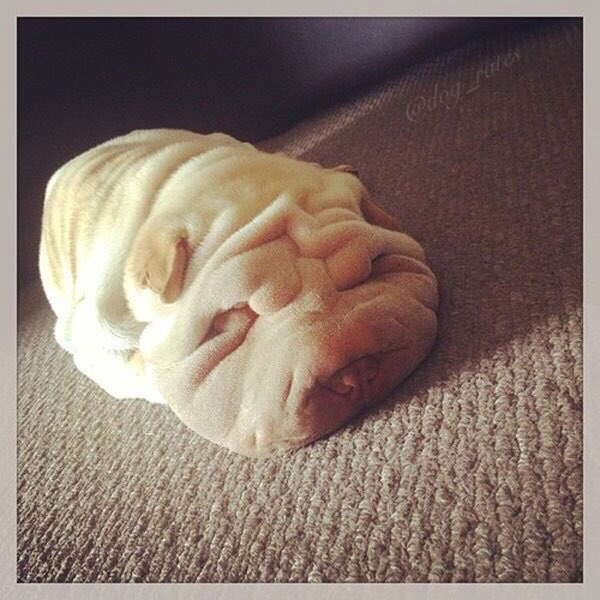

In [243]:
#Display the image from the above tweet
display(i)

In [244]:
#Make a copy of the image_preds dataset
image_preds_copy = image_preds.copy()

In [245]:
#Correctly label the above dog as a shar pei
image_preds_copy.loc[shar_pei.index[0],'p1'] = 'shar_pei'

### Test

In [246]:
image_preds_copy.loc[shar_pei.index[0],'p1']

'shar_pei'

## Assess Issue No. 5
### Define
**Assessment:** entries 487 and 1592 (in image_preds) are duplicated; delete one of them. <br>
**Solution:** drop one of the entries usinge the Pandas.DataFrame.drop() method.

## Clean issue #5
### Code

In [247]:
image_preds_copy.loc[shar_pei.index[0]]

tweet_id                                 675501075957489664
jpg_url     https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg
img_num                                                   1
p1                                                 shar_pei
p1_conf                                            0.806757
p1_dog                                                False
p2                                                   bakery
p2_conf                                           0.0279066
p2_dog                                                False
p3                                              French_loaf
p3_conf                                           0.0181889
p3_dog                                                False
Name: 487, dtype: object

In [248]:
image_preds_copy.loc[shar_pei.index[1]]

tweet_id                                 798673117451325440
jpg_url     https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg
img_num                                                   1
p1                                                    dough
p1_conf                                            0.806757
p1_dog                                                False
p2                                                   bakery
p2_conf                                           0.0279066
p2_dog                                                False
p3                                              French_loaf
p3_conf                                           0.0181889
p3_dog                                                False
Name: 1592, dtype: object

### Test

In [249]:
#Delete one of the above duplicated tweets
image_preds_copy.drop(labels=shar_pei.index[1],axis=0,inplace=True)
image_preds_copy.query('p1 == "shar_pei"')

tweet_id                                          jpg_url  \
487  675501075957489664  https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg   

     img_num        p1   p1_conf  p1_dog      p2   p2_conf  p2_dog  \
487        1  shar_pei  0.806757   False  bakery  0.027907   False   

              p3   p3_conf  p3_dog  
487  French_loaf  0.018189   False

# NOTE:
I decided to see how extensive this issue was (mislabeling of the dogs largest probability). It's pretty bad. My guess what happened is that the author of the image_preds dataset used a pre-trained neural network to classify these animals and the network misclassifed them. There are A LOT of dogs that need relcassification and I'm not a dog expert. What I would do if this were a project where work would be get a list of the animals that have OBVIOUS misclassifications and send those off to an expert (some of them I really can't tell and I've spent several minutes looking and searching for some of their breeds). After this I would create a function or even a class/method to correctly classify the animals. This would not be difficult task once I had the correct classifications of the animals. <br>
An array of the different classifications are shown below. You can see the obvious misclassifications such as "gas_pump".

In [250]:
#Display the possible classifications in the neural network run by Udacity
image_preds['p1'].unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

## Assess Issue No. 6
### Define
**Assessment:** The tweet URLs need to be removed from the text of the tweet. <br>
**Solution:** drop one of the entries usinge the Pandas.Series.extract( ) method and assignment operator to remove the tweet URL from the tweet.

## Clean issue No. 6
### Code

In [251]:
twitter_archive.text.loc[3]

'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ'

In [252]:
twitter_archive_cop = twitter_archive.copy()
twitter_archive_cop.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [253]:
#Get the indices of the tweets that have no expanded URL
url_empty_indices = twitter_archive_cop.loc[(twitter_archive_cop['expanded_urls'].isnull() == True)].index
twitter_archive_cop.loc[url_empty_indices[1],'text']

'@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'

In [254]:
#There are only 55 such URLs
url_empty_indices[1]

55

In [255]:
#Extract the URL from the text of the tweet and reassign the text of the tweet
warnings.simplefilter(action="ignore",category=SettingWithCopyWarning)
for i in range(twitter_archive_cop.shape[0]):
    if i in url_empty_indices:
        pass
    else:
        twitter_archive_cop['text'][i] = twitter_archive_cop.loc[:,'text'].str.rsplit(' ',n=1).array[i][0]
        twitter_archive_cop['text'][i] = twitter_archive_cop.loc[:,'text'].str.split('\n',n=1).array[i][0]

### Test

In [256]:
#Proof it works
twitter_archive_cop['text'][0]

"This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10"

In [257]:
#More proof it works
twitter_archive_cop['text'][6]

'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below'

In [258]:
twitter_archive_cop.loc[url_empty_indices[1],'text']

'@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s'

In [259]:
twitter_archive_cop.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [260]:
#Using sample to show that the urls were removed from the text. Observations with ellipses are longer tweets
twitter_archive_cop['text'].sample(50)

1046    Say hello to Bentley and Millie. They do every...
658     When she says you're a good boy and you know y...
536     This is Lennon. He's a Boopershnoop Pupperdoop...
1802    This is Tyrus. He's a Speckled Centennial Tico...
1786    This is Sandy. He's sexually confused. Thinks ...
2117                                     Meet Herb. 12/10
2228    This is Jareld. Jareld rules these waters. Lad...
1193    People please. This is a Deadly Mediterranean ...
966     This is Zoe. She was trying to stealthily take...
2178    Super rare dog right here guys. Doesn't bark. ...
2286    This is Timison. He just told an awful joke bu...
837     This is Philbert. His toilet broke and he does...
152     This is Dave. He passed the h*ck out. It's bar...
1911    This is Lenny. He wants to be a sprinkler. 10/...
661     RT @dog_rates: This is Alfie. He's touching a ...
1147    This is Sprout. He's just precious af. 12/10 I...
2243    This is Cleopatricia. She is a northern Paperb...
68      RT @do

## Assess issue No. 7
### Define
**Assessment:** Edit timestamp to a datetime object. <br>
**Solution:** Use the Pandas.to_datetime( ) method to change the datatype from 'string' to 'datetime'.

## Clean issue No. 7
### Code

In [261]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [262]:
#Convert 'timestamp' to a date_time object
twitter_archive_cop['timestamp'] = pd.to_datetime(arg=twitter_archive_cop['timestamp'],format='%Y-%m-%d %H:%M:%S')

### Test

In [263]:
twitter_archive_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64

In [264]:
twitter_archive_cop.head(25)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0   892420643555336193                    NaN                  NaN   
1   892177421306343426                    NaN                  NaN   
2   891815181378084864                    NaN                  NaN   
3   891689557279858688                    NaN                  NaN   
4   891327558926688256                    NaN                  NaN   
5   891087950875897856                    NaN                  NaN   
6   890971913173991426                    NaN                  NaN   
7   890729181411237888                    NaN                  NaN   
8   890609185150312448                    NaN                  NaN   
9   890240255349198849                    NaN                  NaN   
10  890006608113172480                    NaN                  NaN   
11  889880896479866881                    NaN                  NaN   
12  889665388333682689                    NaN                  NaN   
13  889638837579907072                    NaN                  NaN   
14  889531135344209921                    NaN                  NaN   
15  889278841981685760                    NaN                  NaN   
16  888917238123831296                    NaN                  NaN   
17  888804989199671297                    NaN                  NaN   
18  888554962724278272                    NaN                  NaN   
19  888202515573088257                    NaN                  NaN   
20  888078434458587136                    NaN                  NaN   
21  887705289381826560                    NaN                  NaN   
22  887517139158093824                    NaN                  NaN   
23  887473957103951883                    NaN                  NaN   
24  887343217045368832                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56+00:00   
1  2017-08-01 00:17:27+00:00   
2  2017-07-31 00:18:03+00:00   
3  2017-07-30 15:58:51+00:00   
4  2017-07-29 16:00:24+00:00   
5  2017-07-29 00:08:17+00:00   
6  2017-07-28 16:27:12+00:00   
7  2017-07-28 00:22:40+00:00   
8  2017-07-27 16:25:51+00:00   
9  2017-07-26 15:59:51+00:00   
10 2017-07-26 00:31:25+00:00   
11 2017-07-25 16:11:53+00:00   
12 2017-07-25 01:55:32+00:00   
13 2017-07-25 00:10:02+00:00   
14 2017-07-24 17:02:04+00:00   
15 2017-07-24 00:19:32+00:00   
16 2017-07-23 00:22:39+00:00   
17 2017-07-22 16:56:37+00:00   
18 2017-07-22 00:23:06+00:00   
19 2017-07-21 01:02:36+00:00   
20 2017-07-20 16:49:33+00:00   
21 2017-07-19 16:06:48+00:00   
22 2017-07-19 03:39:09+00:00   
23 2017-07-19 00:47:34+00:00   
24 2017-07-18 16:08:03+00:00   

                                               source  \
0   <a href="http://twitter.com/download/iphone" r...   
1   <a href="http://twitter.com/download/iphone" r...   
2   <a href="http://twitter.com/download/iphone" r...   
3   <a href="http://twitter.com/download/iphone" r...   
4   <a href="http://twitter.com/download/iphone" r...   
5   <a href="http://twitter.com/download/iphone" r...   
6   <a href="http://twitter.com/download/iphone" r...   
7   <a href="http://twitter.com/download/iphone" r...   
8   <a href="http://twitter.com/download/iphone" r...   
9   <a href="http://twitter.com/download/iphone" r...   
10  <a href="http://twitter.com/download/iphone" r...   
11  <a href="http://twitter.com/download/iphone" r...   
12  <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
14  <a href="http://twitter.com/download/iphone" r...   
15  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/iphone" r...   
17  <a href="http://twitter.com/download/iphone" r...   
18  <a href="http://twitter.com/download/iphone" r...   
19  <a href="http://twitter.com/download/iphone" r...   
20  <a href="http://twitter.com/download/iphone" r...   
21  <a href="http://twitter.com/download/iphone" r...   
22  <a href="http://twitter.com/download/iphone" 

## Assessing Issue No. 8
### Define
**Assessment:** Remove the retweets from the twitter_archive_cop DataFrame. <br>
**Solution:** Remove the indices using array slicing.

## Cleaning issue No. 8
## Code

In [265]:
retweeted_indices = twitter_archive_cop[(twitter_archive.retweeted_status_id.isna() == True)].index
twitter_archive_cop = twitter_archive_cop.loc[retweeted_indices,:]

## Test

In [266]:
twitter_archive_cop.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                  timestamp  \
0 2017-08-01 16:23:56+00:00   
1 2017-08-01 00:17:27+00:00   
2 2017-07-31 00:18:03+00:00   
3 2017-07-30 15:58:51+00:00   
4 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [267]:
twitter_archive_cop.shape[0]

2175

In [268]:
twitter_archive_cop.retweeted_status_user_id.value_counts()

Series([], Name: retweeted_status_user_id, dtype: int64)

In [269]:
twitter_archive_cop.retweeted_status_user_id.unique()

array([nan])

In [270]:
twitter_archive_cop.retweeted_status_id.value_counts()

Series([], Name: retweeted_status_id, dtype: int64)

In [271]:
twitter_archive_cop.retweeted_status_id.unique()

array([nan])

## Assess Issue No. 9
### Define
**Assessment:** Remove columns with mostly NaNs and drop the rows with missing URLs (there are only 59 or them). <br>
**Solution:** drop one of the entries usinge the Pandas.Series.extract( ) method and assignment operator to remove the tweet URL from the tweet.

## Clean Issue No. 9
### Code

In [272]:
twitter_archive_cop.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2097
in_reply_to_user_id           2097
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   58
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [273]:
#Drop the columns that are nearly completely empty
twitter_archive_cop.drop(labels=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',
                                 'retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [274]:
twitter_archive_cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: datetime64[ns, UTC](1), int64(2), object(9)
memory usage: 220.9+ KB


In [275]:
twitter_archive_cop.isnull().sum()

tweet_id               0
timestamp              0
source                 0
text                   0
expanded_urls         58
rating_numerator       0
rating_denominator     0
name                   0
doggo                  0
floofer                0
pupper                 0
puppo                  0
dtype: int64

In [276]:
url_empty_indices = twitter_archive_cop.loc[(twitter_archive_cop['expanded_urls'].isnull() == True)].index
twitter_archive_cop.drop(labels=url_empty_indices,axis=0,inplace=True)

### Test

In [277]:
twitter_archive_cop.isnull().sum()

tweet_id              0
timestamp             0
source                0
text                  0
expanded_urls         0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

# Tidiness Issue
## Assess Issue No. 1
### Define
**Assessment:** Get rid of the columns relating to "dog type", e.g doggo etc, as there are serious classs inbalance issues. For examples. <br>
**Solution:** drop one of the entries usinge the Pandas.Series.extract( ) method and assignment operator to remove the tweet URL from the tweet.

## Clean (tidiness) issue #1
### Code

In [278]:
twitter_archive_cop.columns[0:]
#twitter_archive_cop = twitter_archive.copy()

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [279]:
twitter_archive_cop_backup = twitter_archive_cop.copy()

In [280]:
twitter_archive_cop.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [281]:
twitter_archive_cop.replace(to_replace="None",value='',inplace=True)

In [282]:
twitter_archive_cop[['doggo','floofer','pupper','puppo']].head()

doggo floofer pupper puppo
0                           
1                           
2                           
3                           
4

In [283]:
twitter_archive_cop['dog_type'] = twitter_archive_cop['doggo'] + twitter_archive_cop['floofer'] + twitter_archive_cop['pupper'] + twitter_archive_cop['puppo']

In [284]:
twitter_archive_cop['dog_type'] = twitter_archive_cop['dog_type'].str.strip()

In [285]:
twitter_archive_cop['dog_type'].replace(to_replace='',value='None',inplace=True)

### Test

In [286]:
twitter_archive_cop.head(3)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   

   rating_denominator     name doggo floofer pupper puppo dog_type  
0                  10  Phineas                                None  
1                  10    Tilly                                None  
2                  10   Archie                                None

In [287]:
twitter_archive_cop['dog_type'].value_counts()

None            1779
pupper           222
doggo             72
puppo             23
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

In [288]:
labels = ['doggo','floofer','puppo','pupper']
twitter_archive_cop.drop(labels=labels,axis=1,inplace=True)

In [289]:
twitter_archive_cop.head(1)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name dog_type  
0                  10  Phineas     None

# Tidiness Issue
## Assess Issue No. 2
### Define
**Assessment:** Combine the twitter_archive_cop dataset with the retweet_list by using an inner join. <br>
**Solution:** Use the Pandas.concat( ) function with the join parameter set to 'inner'.

## Clean (tidiness) issue #2
### Code

In [290]:
twitter_archive_cop_backup = twitter_archive_cop.copy()

In [291]:
twitter_archive_cop.set_index('tweet_id',inplace=True)
retweet_list.set_index('tweet_id',inplace=True)

In [292]:
master_twitter_archive = pd.concat(objs=[twitter_archive_cop,retweet_list],axis=1,join='inner')

In [293]:
master_twitter_archive.rating_numerator.value_counts()

12      487
10      435
11      417
13      291
9       154
8        98
7        52
14       40
5        34
6        32
3        19
4        16
2         9
1         5
0         2
60        1
24        1
26        1
44        1
50        1
165       1
80        1
84        1
88        1
143       1
204       1
420       1
1776      1
27        1
45        1
75        1
99        1
121       1
144       1
Name: rating_numerator, dtype: int64

In [294]:
master_twitter_archive.shape

(2110, 10)

In [295]:
master_twitter_archive['rating'] = master_twitter_archive['rating_numerator'] / master_twitter_archive['rating_denominator']

### Test

In [296]:
master_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2110 entries, 892420643555336193 to 666020888022790149
Data columns (total 11 columns):
timestamp             2110 non-null datetime64[ns, UTC]
source                2110 non-null object
text                  2110 non-null object
expanded_urls         2110 non-null object
rating_numerator      2110 non-null int64
rating_denominator    2110 non-null int64
name                  2110 non-null object
dog_type              2110 non-null object
retweet_count         2110 non-null int64
favorite_count        2110 non-null int64
rating                2110 non-null float64
dtypes: datetime64[ns, UTC](1), float64(1), int64(4), object(5)
memory usage: 197.8+ KB


In [297]:
master_twitter_archive.reset_index(inplace=True)

In [298]:
master_twitter_archive.head(1)

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name dog_type  retweet_count  favorite_count  rating  
0                  10  Phineas     None           7426           35195     1.3

In [299]:
master_twitter_archive.to_csv(path_or_buf='twitter_archive_master.csv',sep=',')

# Analyses/Visualizations

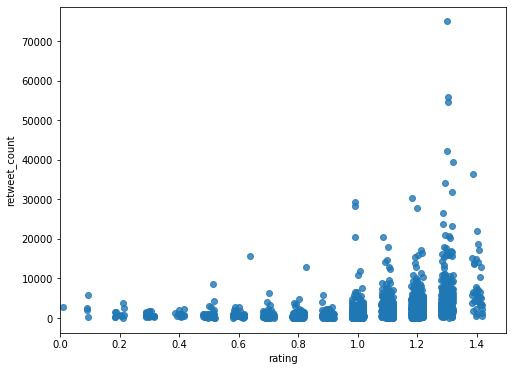

In [309]:
#This graph is just for fun
sns.regplot(x=master_twitter_archive['rating'],y=master_twitter_archive['retweet_count'],fit_reg=False,x_jitter=0.02);
plt.xlim((0,1.50));

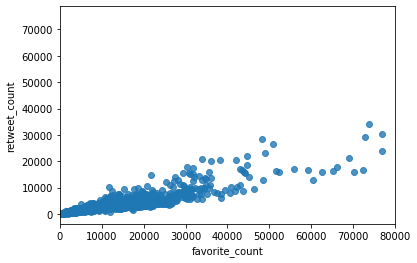

In [301]:
#This graph is just for fun as well
sns.regplot(x=master_twitter_archive['favorite_count'],y=master_twitter_archive['retweet_count'],fit_reg=False);
plt.xlim((0,int(8e4)));

# Analysis #1 - Top Ten Predicted Dog Breeds
The top two dog breeds are both 'retriever' breeds. More details are covered in the act_report.pdf.

In [302]:
top_10_dogs = image_preds_copy['p1'].value_counts()[0:10]
top_10_indices = top_10_dogs.index
base_color = sns.color_palette()[0]

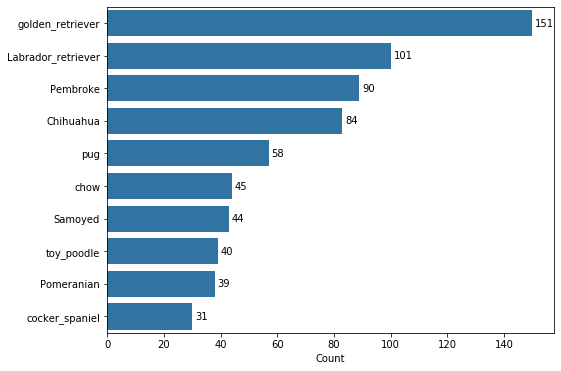

In [303]:
rcParams['figure.figsize'] = 8,6
sns_plot = sns.barplot(y=top_10_indices,x=top_10_dogs,color=base_color);
plt.xlabel('Count');
for i in range(top_10_indices.shape[0]):
    count = top_10_dogs[i]+1
    count_string = str(count)
    plt.text(x=count,y=i,s=count_string,va='center');
plt.savefig('dog_breed_barplot.png',bbox_inches='tight')

# Analysis #2 - Dog "Stage" Bar Plo
'Pupper' is the most common dog stage when a dog stage is given. More details in act_report.pdf.

In [304]:
dog_type_indices = master_twitter_archive['dog_type'].value_counts().index
dog_type_counts = master_twitter_archive['dog_type'].value_counts()

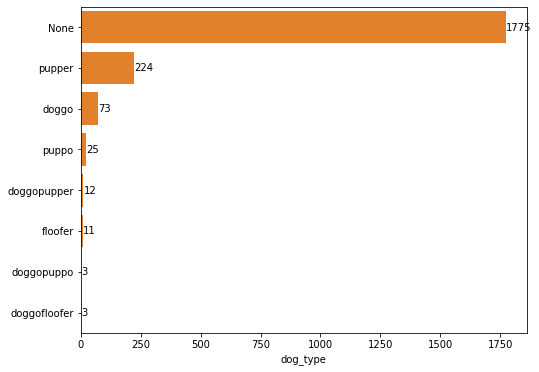

In [305]:
color = sns.color_palette()[1]
rcParams['figure.figsize'] =8,6
sns.barplot(y=dog_type_indices,x=dog_type_counts,color=color);
for i in range(dog_type_indices.shape[0]):
    count = dog_type_counts[i] + 2
    count_string = str(count)
    plt.text(x=count,y=i,s=count_string,va='center')
plt.savefig('dog_stage_barplot.png',bbox_inches='tight')

# Analysis # 3 - Distribution of Retweet Count
The variable 'retweet_count' is a plausibly log-normal distributed random variable. More details are given in act_report.pdf

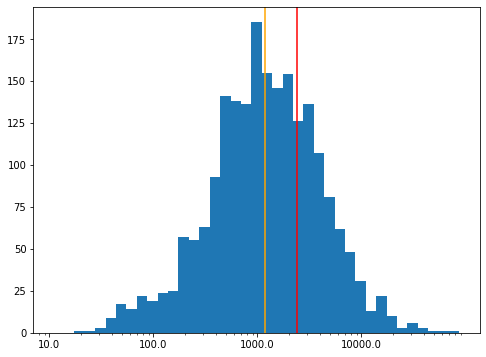

In [306]:
log_desc = np.log10(master_twitter_archive['retweet_count'].describe())
min_log = log_desc['min']
max_log = log_desc['max']
ticks = [10**i for i in np.arange(1,5,1,dtype=float)]
labels = ['{}'.format(i) for i in ticks]
bins_log = 10 ** np.arange(min_log,max_log+0.1,0.1);
plt.hist(master_twitter_archive['retweet_count'],bins=bins_log,density=False);
plt.xscale('log');
plt.xticks(ticks,labels);
count_mean = master_twitter_archive['retweet_count'].mean()
count_median = master_twitter_archive['retweet_count'].quantile(q=0.5)
meas_center = [count_mean,count_median]
colors = ['r','orange']
for (i,j) in zip(meas_center,colors):
    plt.axvline(x=i,color=j);
plt.savefig('log_plot.png',bbox_inches='tight')

In [307]:
print('The median of retweet count is {} and the mean is {}'.format(count_median,count_mean))

The median of retweet count is 1174.5 and the mean is 2421.3663507109004


In [308]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None